In [3]:
import pandas as pd

## **Chargement du dataset prétraité**

In [4]:
df = pd.read_csv('data_processed.csv.gz')

## Aperçu du dataset

In [5]:
df.head()

,Unnamed: 0,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive


### Suppression de la colonne "Unnamed: 0"

In [6]:
df = df.drop(columns=df.columns[0])

In [7]:
df.head()

,Id,review,cleanReview,rating,ratingSentiment,ratingSentimentLabel,vaderReviewScore,vaderSentiment,vaderSentimentLabel
0,163740,"""I&#039;ve tried a few antidepressants over th...","""I&#039;ve tried antidepressants years (citalo...",10.0,2,positive,0.7429,2,positive
1,206473,"""My son has Crohn&#039;s disease and has done ...","""My son Crohn&#039;s disease done well Asacol....",8.0,2,positive,0.4767,2,positive
2,159672,"""Quick reduction of symptoms""","""Quick reduction symptoms""",9.0,2,positive,0.0000,0,neutral
3,39293,"""Contrave combines drugs that were used for al...","""Contrave combines drugs used alcohol, smoking...",9.0,2,positive,0.8115,2,positive
4,97768,"""I have been on this birth control for one cyc...","""I birth control one cycle. After reading revi...",9.0,2,positive,0.9617,2,positive


## Groupement des données sur "vaderSentimentLabel"

In [8]:
df.groupby('vaderSentimentLabel').size()

vaderSentimentLabel
negative     99830
neutral       9035
positive    106198
dtype: int64

### Diagramme en bandes de "vaderSentimentLabel"



In [9]:
import matplotlib.pyplot as plt

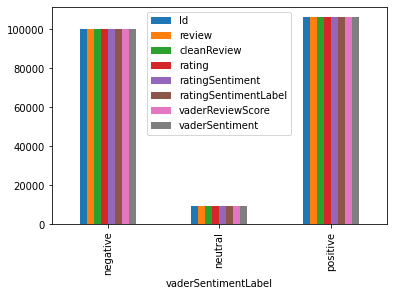

In [10]:
df.groupby('vaderSentimentLabel').count().plot.bar()
plt.show()

## Groupement des données sur "ratingSentimentLabel"

In [11]:
df.groupby('ratingSentimentLabel').size()

ratingSentimentLabel
negative     46901
neutral      25856
positive    142306
dtype: int64

### Diagramme en bandes de "ratingSentimentLabel"



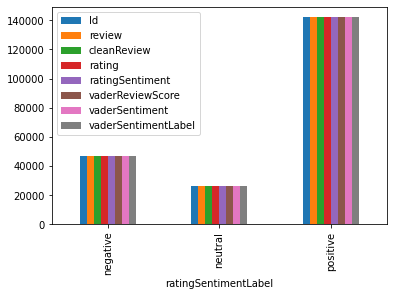

In [12]:
df.groupby('ratingSentimentLabel').count().plot.bar()
plt.show()

## Groupement des données sur "ratingSentiment"

In [13]:
df.groupby('ratingSentiment').size()

ratingSentiment
0     25856
1     46901
2    142306
dtype: int64

### Diagramme en bandes de "ratingSentiment"

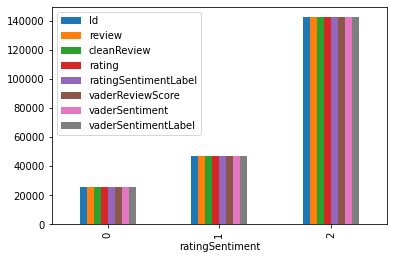

In [14]:
df.groupby('ratingSentiment').count().plot.bar()
plt.show()

## **Récupération des phrases de sentiment "positif"**

In [15]:
positive_vader_sentiments = df[df.ratingSentiment == 2]
positive_string = []
for s in positive_vader_sentiments.cleanReview:
  positive_string.append(s)
positive_string = pd.Series(positive_string).str.cat(sep=' ')

## **Nuages des mots positifs**

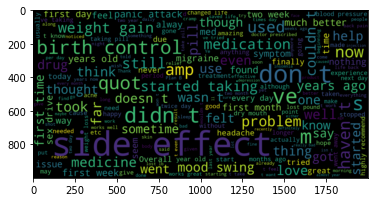

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(positive_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.show()

### 'side effect' dans les 20 premières observations positives

In [17]:
for s in positive_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"I&#039;ve tried antidepressants years (citalopram, fluoxetine, amitriptyline), none helped depression, insomnia &amp; anxiety. My doctor suggested changed onto 45mg mirtazapine medicine saved life. Thankfully I side effects especially common - weight gain, I&#039;ve actually lost alot weight. I still suicidal thoughts mirtazapine saved me."
"My son Crohn&#039;s disease done well Asacol. He complaints shows side effects. He taken many nine tablets per day one time. I&#039;ve happy results, reducing bouts diarrhea drastically."
"I birth control one cycle. After reading reviews type similar birth controls I bit apprehensive start. Im giving birth control 9 10 I long enough 10. So far I love birth control! My side effects minimal like Im even birth control! I experienced mild headaches nausea ive feeling great! I got period cue third day inactive pills I idea coming I zero pms! My period light I barely cramping! I unprotected sex first month obviously didn&#039;t get pregnant I&#039;m ple

## **Récupération des phrases de sentiment "négarif"**

In [18]:
negative_vader_sentiments = df[df.ratingSentiment == 1]
negative_string = []
for s in negative_vader_sentiments.cleanReview:
  negative_string.append(s)
negative_string = pd.Series(negative_string).str.cat(sep=' ')

## **Nuages des mots négatifs**

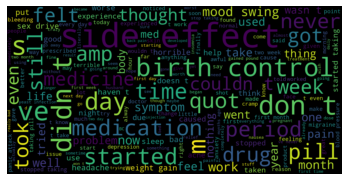

In [19]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(negative_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 'side effect' dans les 20 premières observations négatives

In [20]:
for s in negative_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"About two months ago I switch LoLestrin Fe microgestin due insurance pharmacy. Since starting microgestin I&#039;ve noticed insane bloating nausea weird discharge. While lolestrin, periods consisted spotting average side effects, nothing serious, one month micro I got period heavy cramping painful I leave class. I&#039;ve also noticed I&#039;ve developed bad depression mood swings intense. My anxiety bad sex drive low nonexistent anymore. It helped acne I&#039;m lot paranoid getting pregnant I lolestrin. I&#039;m going talking doctor possibly getting shot."
"I 12 year survivor mirapex/Pramepexole. It miracle begin with. I slept 4hrs night enormous energy never tired. That lasted nine years. But time I lost bladder control, impulse disorders, loss concentration, myalgia neuropathy, falling asleep driving, many augmentation. I .5 mg. Detoxing med free med horrendous! After detox side effects cleared up. But I still issues memory concentration. This med I took reg bases health good. Im s

In [21]:
neutral_vader_sentiments = df[df.ratingSentiment == 0]
neutral_string = []
for s in neutral_vader_sentiments.cleanReview:
  neutral_string.append(s)
neutral_string = pd.Series(neutral_string).str.cat(sep=' ')

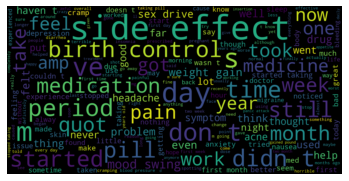

In [22]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=2000,height=1000,max_font_size=200).generate(neutral_string)
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.show()

### 'side effect' dans les 20 premières observations négatives

In [23]:
for s in neutral_vader_sentiments.cleanReview[:20]:
  if 'side effect' in s:
    print(s)

"Have Actos almost year, gained 24 pounds swelling hands feet retaining lot water thighs. My sugar levels good. My doctor lowered dosage 30 mg 15 mg refused take off. Will get second opinion side effects much."
"I&#039;d never birth control months ago, I given Ortho Tri-Cyclen Lo starter, I want much hormones. I went two whole packs decided switch extremely low sex drive, extreme mood swings increased appetite (I would eat full meal two hours later stomach would growling again). My relationship began suffer due side effects I stopped taking back normal. However, pill DID pros: I didn&#039;t get pregnant, regulated period caused breakouts acne. But wary weight gain, decreased libido mood swings."


# **Féquences TF-IDF et Vectorisation**

# __Vectorisation__
Les modèles ML ne peuvent pas traiter directement les contenus textuels. 
<br> Pour entraîner un modèle, il faut d'abord transformer le texte en caractéristiques numériques. 

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [25]:
tfidf = TfidfVectorizer(stop_words='english',ngram_range=(1,2))
features = tfidf.fit_transform(df.cleanReview)
labels   = df.vaderSentiment

In [26]:
features.shape

(215063, 1619394)

# **Apprentissage et évaluation du modèle**

## MultinomialNB et d'autres pour la construction du modèle

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

## Répartition en train_set et test_set

In [28]:
x_train,x_test,y_train,y_test = train_test_split(df['cleanReview'],df['ratingSentimentLabel'],random_state=0)

## Importation des algorithmes pour la catégorisation

*   MultinomialNB
*   LogisticRegression
*   RandomForest
*   LinearSVC



In [29]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
#from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler

## Cross Validation

In [30]:
models = [RandomForestClassifier(n_estimators=200,max_depth=3,random_state=0),LinearSVC(),
          MultinomialNB(),LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []
for model in models:
  model_name = model.__class__.__name__
  accuracies = cross_val_score(model,features,labels,scoring='accuracy',cv=CV)
  for fold_idx,accuracy in enumerate(accuracies):
    entries.append((model_name,fold_idx,accuracy))
cv_df = pd.DataFrame(entries,columns=['model_name','fold_idx','accuracy'])

In [31]:
cv_df

,model_name,fold_idx,accuracy
0,RandomForestClassifier,0,0.494362
1,RandomForestClassifier,1,0.494316
2,RandomForestClassifier,2,0.493897
3,RandomForestClassifier,3,0.493955
4,RandomForestClassifier,4,0.494257
5,LinearSVC,0,0.941948
6,LinearSVC,1,0.943343
7,LinearSVC,2,0.945598
8,LinearSVC,3,0.947968
9,LinearSVC,4,0.945597


## Taux d'exactitude de chaque modèle

In [32]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LinearSVC                 0.944891
LogisticRegression        0.902847
MultinomialNB             0.832779
RandomForestClassifier    0.494158
Name: accuracy, dtype: float64

## Apprentissage et nomalisation avec LinearSVC qui a le plus grand taux d'exactitude

In [33]:
from sklearn.preprocessing import Normalizer

In [34]:
model = LinearSVC('l2')
x_train,x_test,y_train,y_test = train_test_split(features,labels,test_size=0.25,random_state=0)
normalize = Normalizer()
x_train = normalize.fit_transform(x_train)
x_test = normalize.transform(x_test)
model.fit(x_train,y_train)
y_pred = model.predict(x_test)

## Evaluation de la catégorisation avec LinearSVC

In [35]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.9391250976453521


## Matrice de confision

In [36]:
from sklearn.metrics import confusion_matrix
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[ 1392,   345,   482],
       [   11, 23738,  1229],
       [   39,  1167, 25363]])

In [37]:
from mlxtend.plotting import plot_confusion_matrix

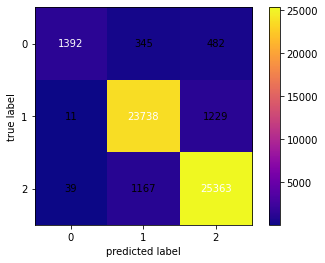

In [38]:
fig,ax = plot_confusion_matrix(conf_mat=conf_mat,colorbar=True,show_absolute=True,cmap='plasma')

## Synthèse des métriques d'évaluation

In [39]:
from  sklearn.metrics import classification_report
print(classification_report(y_test,y_pred,target_names= df['ratingSentimentLabel'].unique()))

              precision    recall  f1-score   support

    positive       0.97      0.63      0.76      2219
     neutral       0.94      0.95      0.95     24978
    negative       0.94      0.95      0.95     26569

    accuracy                           0.94     53766
   macro avg       0.95      0.84      0.88     53766
weighted avg       0.94      0.94      0.94     53766



###  * La précision est le rapport entre toutes les erreurs identifiées de manière adéquate et toutes les erreurs identifiées.

### * La précision positive signifie que chaque fois qu'un résultat positif a été prédit, le modèle avait raison dans 94 % des cas.

### * Précision neutre signifie qu'à chaque fois qu'une valeur neutre a été prédite, le modèle a été correct dans 93 % des cas.

### * La précision négative signifie qu'à chaque fois qu'une valeur négative a été prédite, le modèle avait raison dans 93 % des cas.

## Avec une moyenne pondérée de 93% Ce modèle est assez bon pour reconnaître les erreurs.

### * Le rappel, la sensibilité ou le taux de vrais positifs est un rapport entre toutes les erreurs identifiées et toutes les erreurs existantes.

### * Le rappel positif signifie que le positif a été sélectionné 63 % des fois où il aurait dû l'être.

### * Un rappel neutre signifie que le neutre a été sélectionné dans 95 % des cas où il aurait dû l'être.

### * Le rappel négatif signifie que le négatif a été sélectionné 94% du temps où il aurait dû l'être.

##Ce modèle est assez bon pour classer les erreurs, mais il semble plus faible pour classer les classes positives avec un pourcentage de rappel de 63%.